In [382]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [383]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [384]:
dataset = pd.read_csv(r"C:/Users/User/Downloads/day.csv", encoding= 'unicode_escape')


## Data Inspection

In [385]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [386]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [387]:
dataset.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [388]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [389]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [390]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


## Observations

In [391]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [392]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [393]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [394]:
dataset['Month'] = dataset['dteday'].dt.month

dataset['Day'] = dataset['dteday'].dt.day_name()    

In [395]:
dataset['Weekdays_or_weekend'] = dataset['dteday'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [396]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   dteday               731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   yr                   731 non-null    int64         
 4   mnth                 731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weathersit           731 non-null    int64         
 9   temp                 731 non-null    float64       
 10  atemp                731 non-null    float64       
 11  hum                  731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

In [397]:
dataset.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,Saturday,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,Sunday,0


In [398]:
dataset.drop(['dteday',"Day",'instant', 'casual', 'registered','temp','mnth'],axis=1 ,inplace=True)

In [399]:
dataset.head(2)

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Month,Weekdays_or_weekend
0,1,0,0,6,0,2,0.363625,0.805833,0.160446,985,1,0
1,1,0,0,0,0,2,0.353739,0.696087,0.248539,801,1,0


In [400]:
dataset['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [401]:
dataset['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [402]:
dataset['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [403]:
dataset['Month'].value_counts()

Month
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [404]:
dataset['Weekdays_or_weekend'].value_counts()

Weekdays_or_weekend
0    731
Name: count, dtype: int64

In [405]:
dataset.describe()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Month,Weekdays_or_weekend
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,2.496580,0.500684,0.028728,2.997264,0.683995,1.395349,0.474354,0.627894,0.190486,4504.348837,6.519836,0.0
std,1.110807,0.500342,0.167155,2.004787,0.465233,0.544894,0.162961,0.142429,0.077498,1937.211452,3.451913,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.079070,0.000000,0.022392,22.000000,1.000000,0.0
25%,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.337842,0.520000,0.134950,3152.000000,4.000000,0.0
50%,3.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.486733,0.626667,0.180975,4548.000000,7.000000,0.0
75%,3.000000,1.000000,0.000000,5.000000,1.000000,2.000000,0.608602,0.730209,0.233214,5956.000000,10.000000,0.0
max,4.000000,1.000000,1.000000,6.000000,1.000000,3.000000,0.840896,0.972500,0.507463,8714.000000,12.000000,0.0


In [406]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis


In [407]:
numeric_features = dataset.describe().columns
numeric_features

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'atemp', 'hum', 'windspeed', 'cnt', 'Month', 'Weekdays_or_weekend'],
      dtype='object')

In [408]:
categorical_columns = list(set(dataset.columns) - set(numeric_features))
categorical_columns

[]

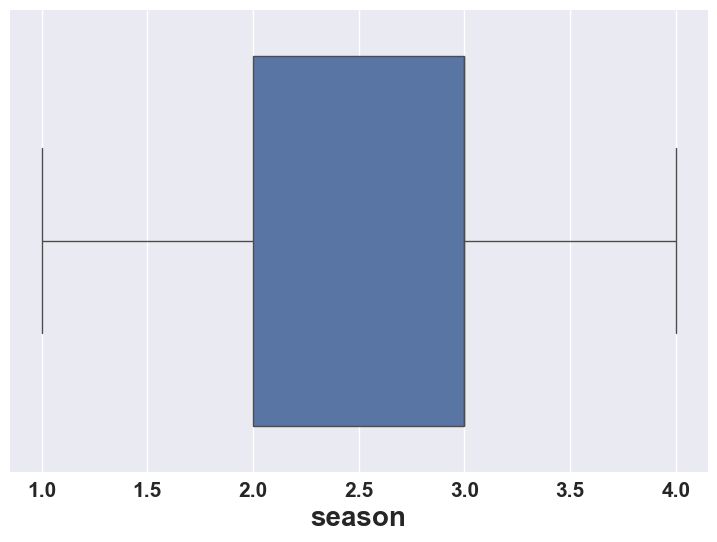

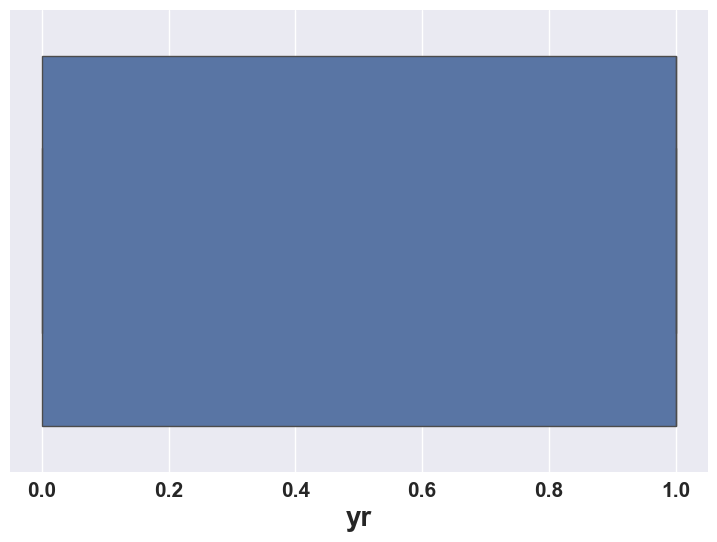

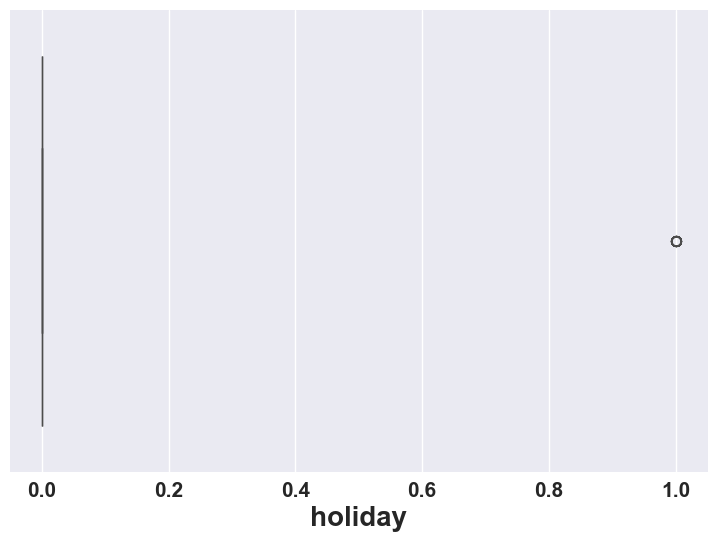

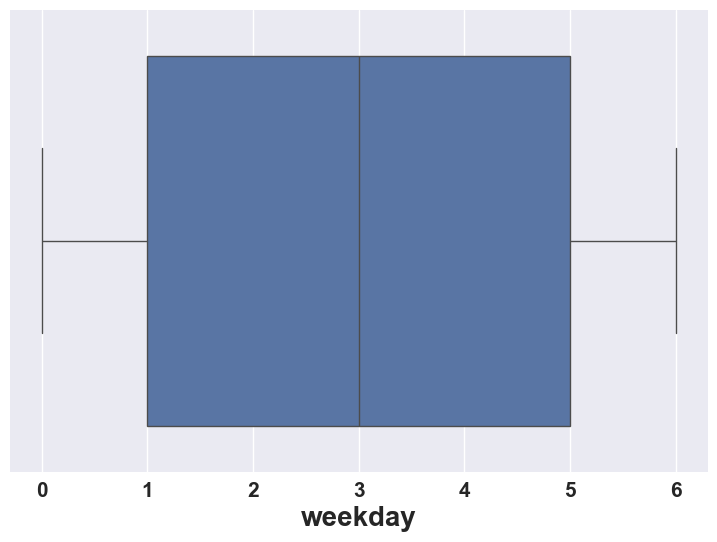

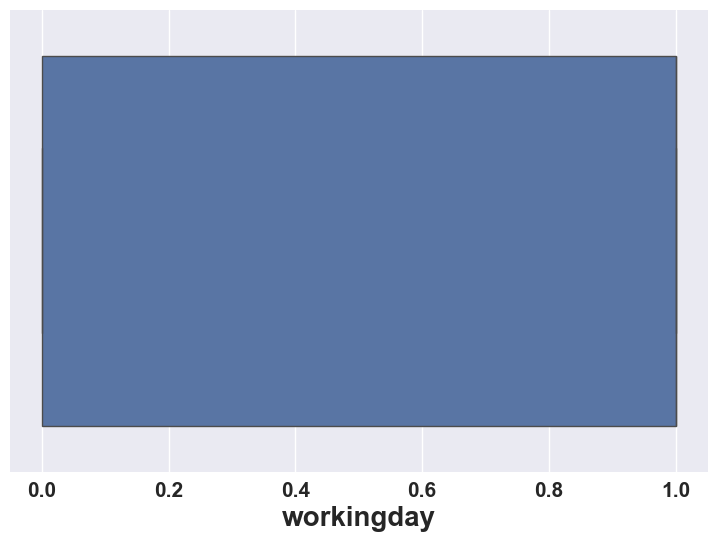

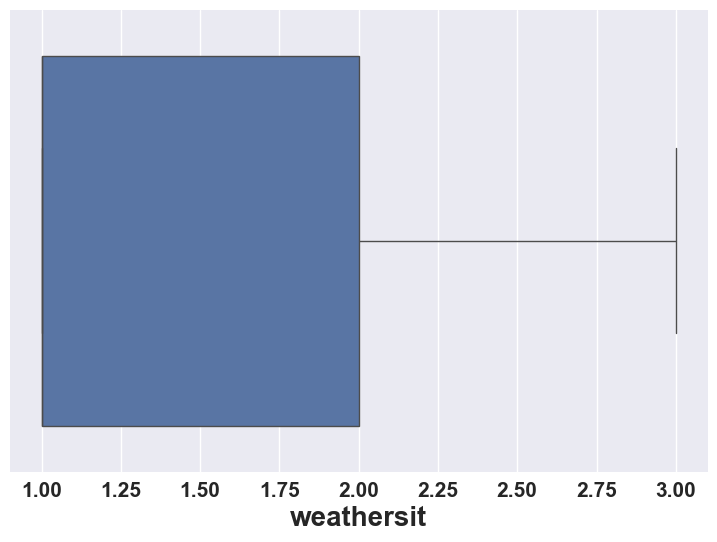

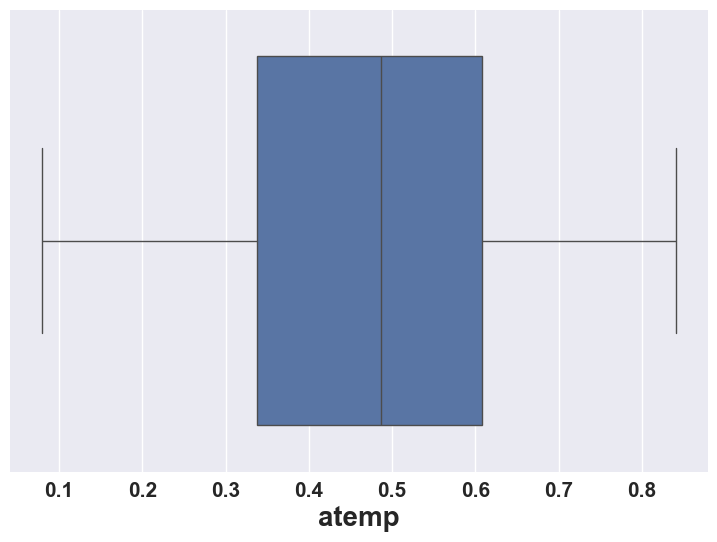

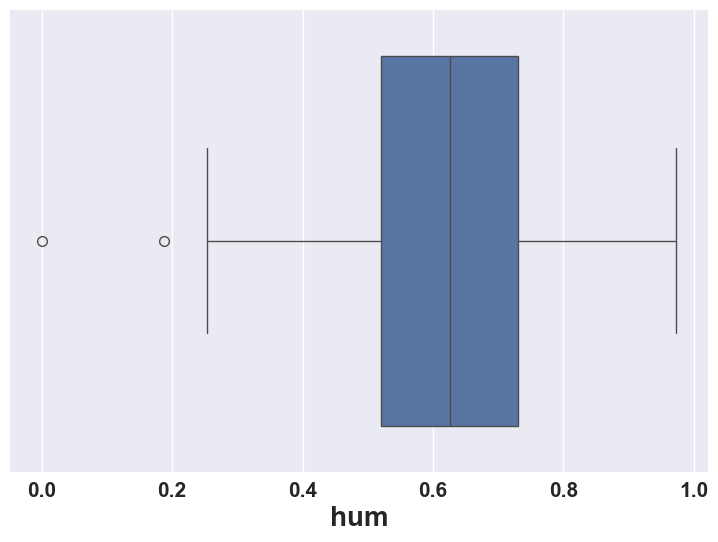

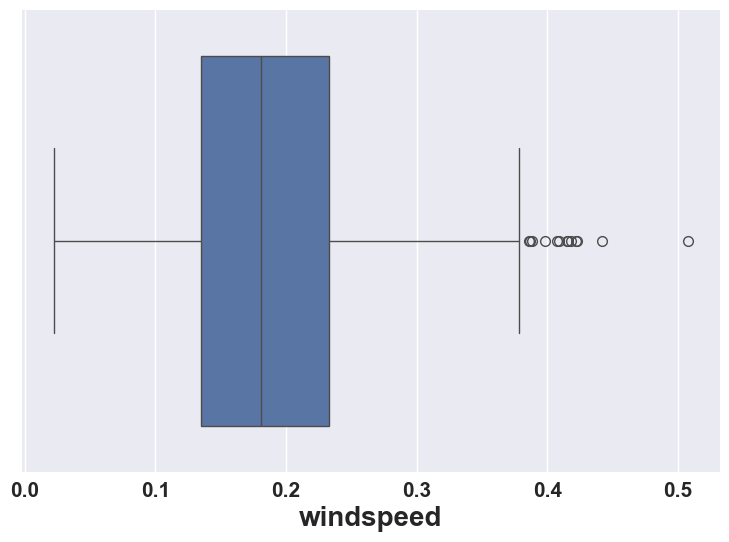

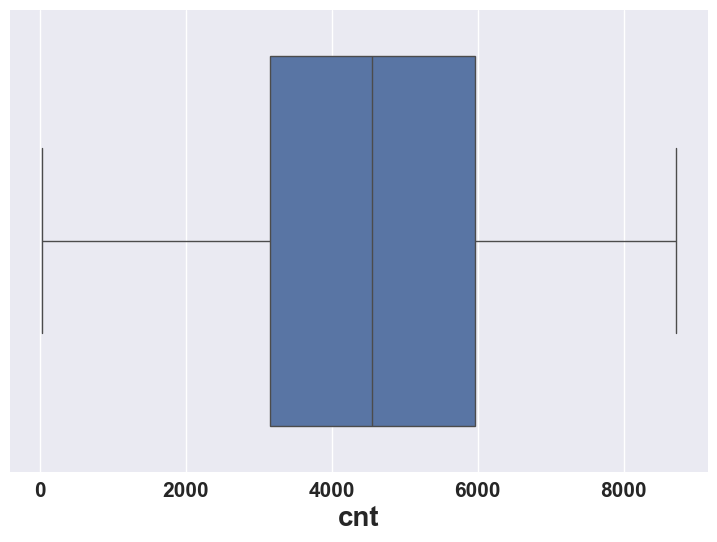

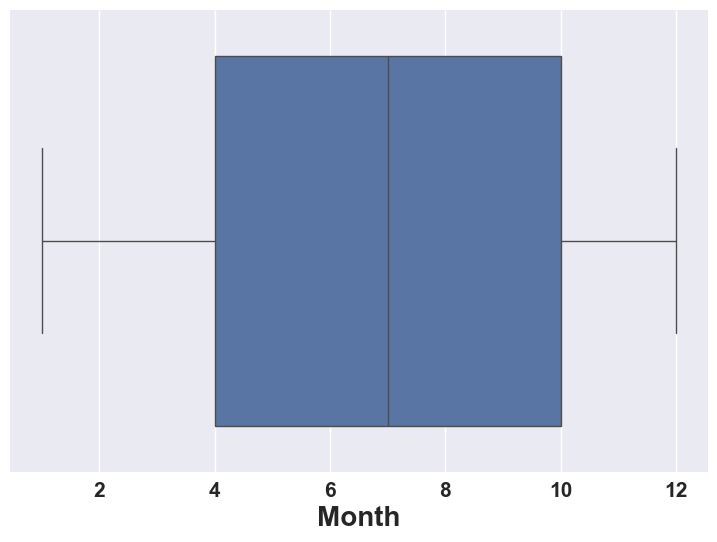

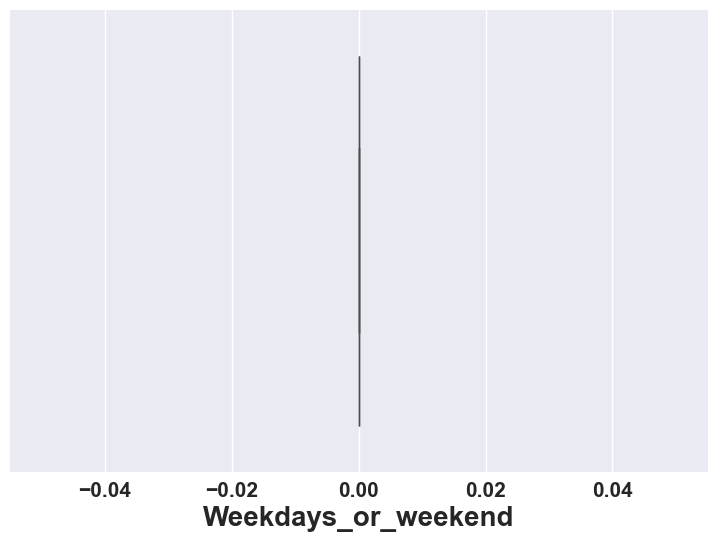

In [409]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

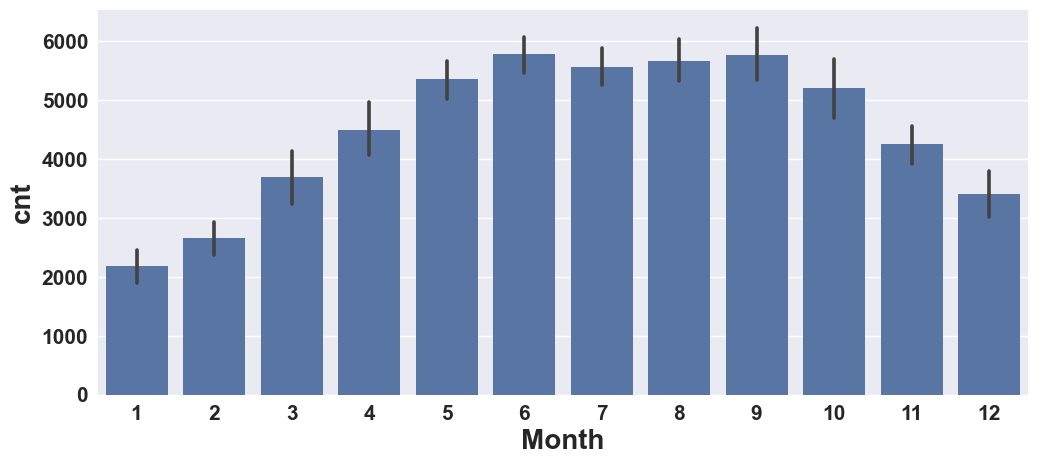

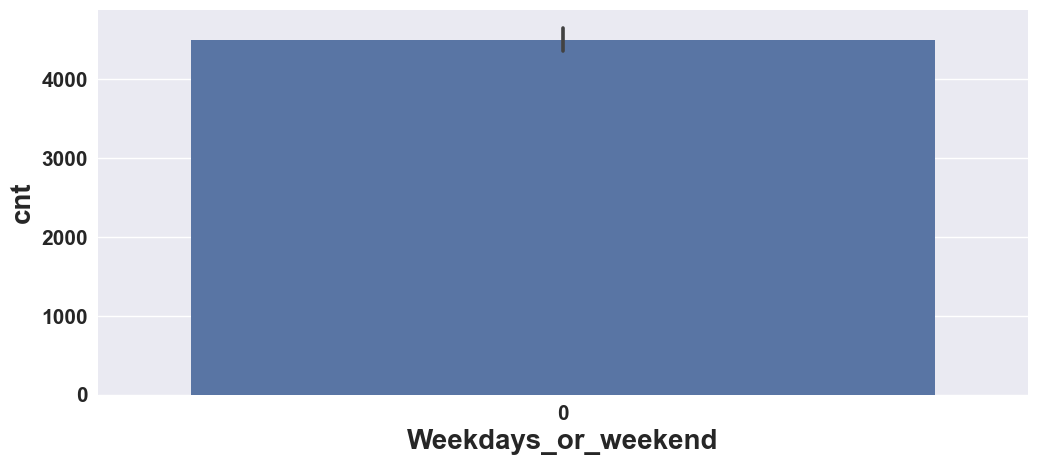

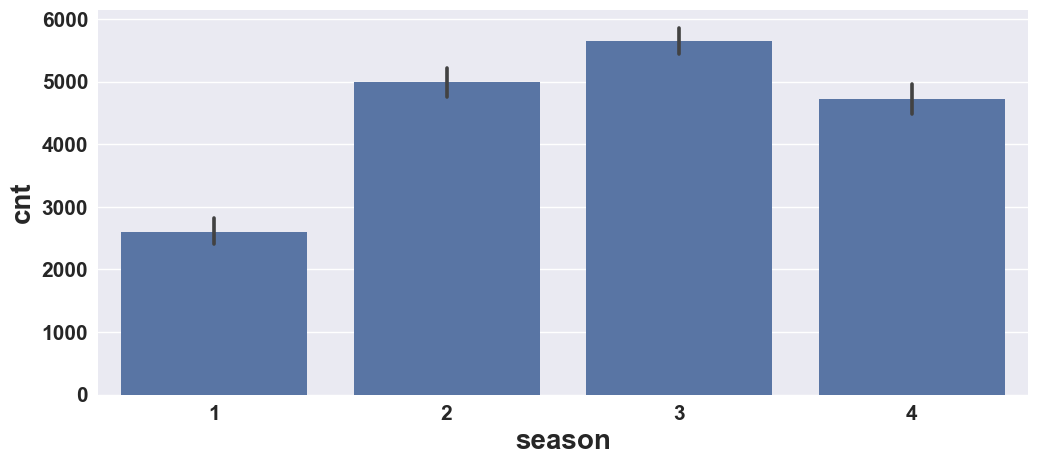

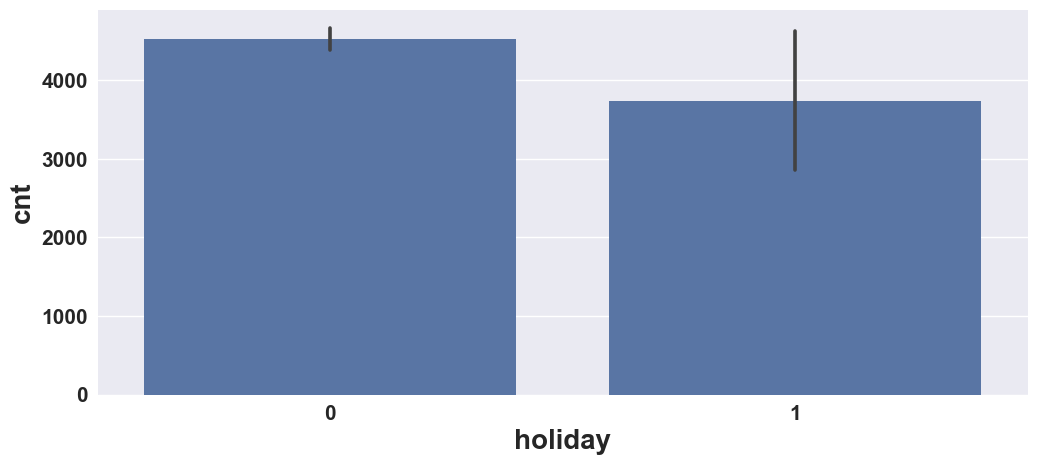

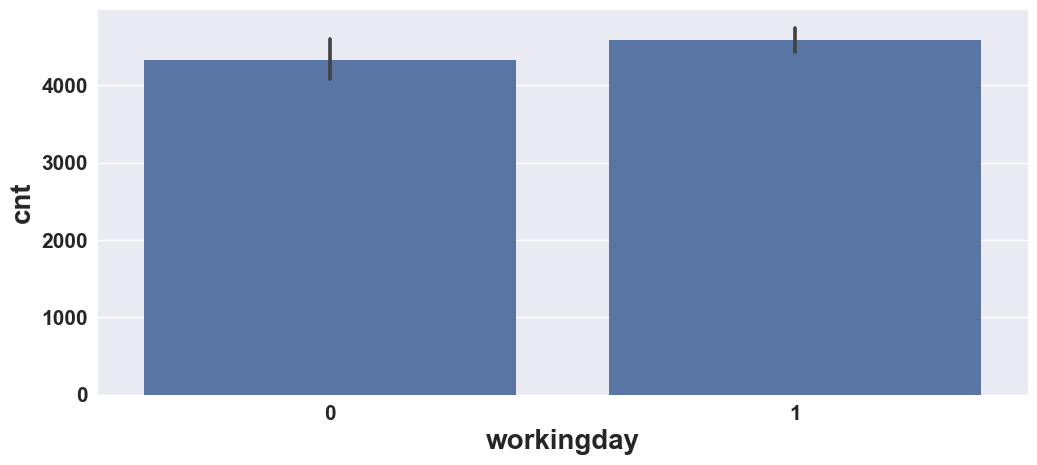

In [410]:
categorical_columns.extend(['Month','Weekdays_or_weekend','season','holiday','workingday'])

for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

## Observations from Above Charts -->

## Seasonal Trend:
The Fall season recorded the highest number of bike rentals, indicating that users are most active during this period. In contrast, Spring exhibited the lowest rental activity, suggesting reduced demand during this season.

## Holiday Impact:
A significant increase in bike rentals was observed on holidays, implying that individuals prefer biking for leisure and recreational purposes on non-working days.

## Weekday vs Weekend Usage:
Weekdays showed higher rental counts compared to weekends, suggesting that a large proportion of users utilize bikes primarily for commuting or daily travel purposes.

## Monthly Trend:
The bike rental count began to rise steadily from March and reached its peak in June, highlighting a clear upward trend in demand with the onset of warmer months.